In [1]:
import pm4py
import pandas as pd
from pm4py.objects.conversion.log import converter as log_conv

# basic info

In [2]:
df = pd.read_csv('./repair2.csv')
print(pd.DataFrame(df['RepairCode']).value_counts())
print(pd.DataFrame(df['RepairType']).value_counts())
print(pd.DataFrame(df['contact']).value_counts())
print(pd.DataFrame(df['RepairOK']).value_counts())


RepairCode
1.0           550
2.0           224
3.0            94
4.0            59
dtype: int64
RepairType
P             439
E             370
B             118
dtype: int64
contact 
Phone       270
Web         265
Personal    240
Letter      225
dtype: int64
RepairOK
True        1854
dtype: int64


In [3]:
df

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time
0,419,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-06,11:51
1,561,ArrangeSurvey,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-07,13:48
2,902,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,2020-01-08,16:20
3,18,Survey,Edd,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-09,6:55
4,852,Survey,Edd,complete,NaN,NaN,NaN,True,240.0,1.0,NaN,2020-01-10,11:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13257,707,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07,0:16
13258,25,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,7:48
13259,762,ArrangeSurvey,Monica,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-03,11:53
13260,12,InternRepair,Cindy,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-08,18:10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13262 entries, 0 to 13261
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseID               13262 non-null  int64  
 1   taskID               13260 non-null  object 
 2   originator           13260 non-null  object 
 3   eventtype            13257 non-null  object 
 4   contact              1000 non-null   object 
 5   RepairType           927 non-null    object 
 6   objectKey            927 non-null    float64
 7   RepairInternally     927 non-null    object 
 8   EstimatedRepairTime  927 non-null    float64
 9   RepairCode           927 non-null    float64
 10  RepairOK             1854 non-null   object 
 11  date                 13249 non-null  object 
 12  time                 13249 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.3+ MB


# 제거데이터

- RepairOK 기록이 없는 caseID 데이터 분리 tp/repNO
- contact 기록이 없는 caseID 
- 시간이 없는 데이터 


In [5]:
df = pd.read_csv('./repair2.csv')
tp = df[df['RepairOK'] == True]
tp.sort_values('caseID')
using_case = list(tp[tp['taskID'] == 'RepairReady']['caseID'].sort_values())

In [6]:
# repOK case
import pandas as pd
import pm4py
import warnings
warnings.filterwarnings('ignore')

tp = pd.DataFrame()
dataframe = df
# dataframe = pd.read_csv('./repair2.csv')

# temp = [str(i).split(':') for i in dataframe['time']]
# minutes = []
# for time in temp:
#     i = 0
#     if len(time) != 2:
#         minutes.append(0)
#         continue    
#     i += int(time[0]) * 60 + int(time[1])
#     minutes.append(i)

# dataframe['minutes'] = minutes
    
    
for i in range(1,1001):
    if i in using_case:
        pass
    else:
        continue
        
    # dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
    # merterial = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID',timestamp_key='date')
    merterial = dataframe.groupby('caseID').get_group(i)
    merterial = merterial.sort_values('date')
    merterial['contact'] = merterial['contact'].fillna('ZZ')
    change = sorted(list(set(merterial['contact'])))
    merterial['contact'] = merterial['contact'].replace('ZZ',change[0])
    
    if len(change) == 1:
        continue
    
    tp = pd.concat([tp,merterial])

tp

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time
5903,1,FirstContact,Dian,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1905-05-23,0:00
4035,1,MakeTicket,Dian,complete,Phone,E,1340.0,NaN,NaN,NaN,NaN,1970-01-02,8:11
4561,1,ArrangeSurvey,Dian,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,8:16
5098,1,ArrangeSurvey,Dian,start,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,8:11
9171,1,InformClientSurvey,System,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,8:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8609,1000,InternRepair,John,complete,Web,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19,18:34
8698,1000,InternRepair,John,start,Web,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19,14:34
2987,1000,ReadyInformClient,System,complete,Web,NaN,NaN,NaN,NaN,NaN,True,1970-01-20,2:25
3604,1000,TicketReady,System,complete,Web,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-20,2:25


In [7]:
# repairNonOK data
import pandas as pd
import pm4py
import warnings
warnings.filterwarnings('ignore')

repNO = pd.DataFrame()
dataframe = df

# temp = [str(i).split(':') for i in dataframe['time']]
# minutes = []
# for time in temp:
#     i = 0
#     if len(time) != 2:
#         minutes.append(0)
#         continue    
#     i += int(time[0]) * 60 + int(time[1])
#     minutes.append(i)

# dataframe['minutes'] = minutes
    
    
for i in range(1,1001):
    if i not in using_case:
        pass
    else:
        continue
        
    #dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
    # merterial = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID',timestamp_key='date')
    merterial = dataframe.groupby('caseID').get_group(i)
    merterial = merterial.sort_values('date')
#     merterial['contact'] = merterial['contact'].fillna('ZZ')
#     change = sorted(list(set(merterial['contact'])))
#     merterial['contact'] = merterial['contact'].replace('ZZ',change[0])
    
    if len(change) == 1:
        continue
    
    repNO = pd.concat([repNO,merterial])
repNO

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time
4568,6,InformClientWrongPlace,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-03,2:29
13019,6,FirstContact,Monica,complete,Letter,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-03,2:29
990,7,FirstContact,Monica,complete,Letter,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07,9:21
11385,7,InformClientWrongPlace,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07,9:21
1325,13,FirstContact,Monica,complete,Web,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,12:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11879,918,FirstContact,Monica,complete,Web,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07,20:52
1362,942,FirstContact,Monica,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07,13:14
4020,942,InformClientWrongPlace,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07,13:14
4334,966,InformClientWrongPlace,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-06,2:35


In [63]:
repNO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 4568 to 9269
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseID               146 non-null    int64  
 1   taskID               146 non-null    object 
 2   originator           146 non-null    object 
 3   eventtype            146 non-null    object 
 4   contact              73 non-null     object 
 5   RepairType           0 non-null      object 
 6   objectKey            0 non-null      float64
 7   RepairInternally     0 non-null      object 
 8   EstimatedRepairTime  0 non-null      float64
 9   RepairCode           0 non-null      float64
 10  RepairOK             0 non-null      object 
 11  date                 146 non-null    object 
 12  time                 146 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 16.0+ KB


In [64]:
repNO['taskID'].value_counts()

InformClientWrongPlace    73
FirstContact              73
Name: taskID, dtype: int64

In [8]:
# date, time 결합
tp = tp.sort_values(['date','time'])[:-13] # 시간이없는경우 제거
tp = tp.reset_index().drop('index',axis=1)

In [9]:
col = [f"{tp.loc[i,'date']} {tp.loc[i,'time']}" for i in range(len(tp))]
tp = tp.drop('date',axis=1)
tp = tp.drop('time',axis=1)
tp['date'] = col

In [10]:
tp['date'] = pd.to_datetime(tp['date'])

In [11]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13103 entries, 0 to 13102
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   caseID               13103 non-null  int64         
 1   taskID               13101 non-null  object        
 2   originator           13101 non-null  object        
 3   eventtype            13099 non-null  object        
 4   contact              13103 non-null  object        
 5   RepairType           927 non-null    object        
 6   objectKey            927 non-null    float64       
 7   RepairInternally     927 non-null    object        
 8   EstimatedRepairTime  927 non-null    float64       
 9   RepairCode           927 non-null    float64       
 10  RepairOK             1850 non-null   object        
 11  date                 13103 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 1.2+ MB


<AxesSubplot:>

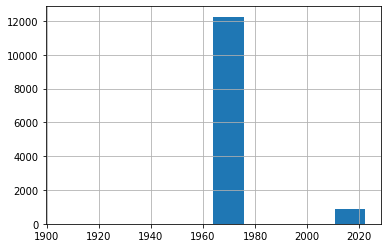

In [12]:
# 날짜 제거 
tp['date'].hist()

In [13]:
tp = tp[tp['date'] > '1940-01-01']
tp = tp[tp['date'] < '2000-01-01']
tp # log data setting

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date
6,295,FirstContact,Monica,complete,Personal,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00
7,556,Survey,Cindy,complete,Web,NaN,NaN,True,240.0,1.0,NaN,1970-01-01 10:00:00
8,556,InternRepair,Paul,start,Web,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 10:00:00
9,502,FirstContact,Monica,complete,Personal,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 10:11:00
10,746,ImmediateRepair,Jacky,start,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 10:13:00
...,...,...,...,...,...,...,...,...,...,...,...,...
12248,684,SendTicketToFinAdmin,System,complete,Web,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-20 07:20:00
12249,396,TicketReady,System,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-20 07:28:00
12250,396,ReadyInformClient,System,complete,Phone,NaN,NaN,NaN,NaN,NaN,True,1970-01-20 07:28:00
12251,890,ReadyInformClient,System,complete,Personal,NaN,NaN,NaN,NaN,NaN,True,1970-01-20 07:38:00


In [62]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12247 entries, 6 to 12252
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   caseID               12247 non-null  int64         
 1   taskID               12245 non-null  object        
 2   originator           12245 non-null  object        
 3   eventtype            12243 non-null  object        
 4   contact              12247 non-null  object        
 5   RepairType           853 non-null    object        
 6   objectKey            853 non-null    float64       
 7   RepairInternally     869 non-null    object        
 8   EstimatedRepairTime  869 non-null    float64       
 9   RepairCode           869 non-null    float64       
 10  RepairOK             1728 non-null   object        
 11  date                 12247 non-null  datetime64[ns]
 12  case:concept:name    12247 non-null  int64         
 13  concept:name         12245 non-

In [32]:
# repairNonOK data
import pandas as pd
import pm4py
import warnings
warnings.filterwarnings('ignore')

log_target = pd.DataFrame()
dataframe = tp

# temp = [str(i).split(':') for i in dataframe['time']]
# minutes = []
# for time in temp:
#     i = 0
#     if len(time) != 2:
#         minutes.append(0)
#         continue    
#     i += int(time[0]) * 60 + int(time[1])
#     minutes.append(i)

# dataframe['minutes'] = minutes
    
merterial = pm4py.format_dataframe(dataframe, activity_key='taskID',timestamp_key='date')
for i in range(1,1001):
#     if i not in using_case:
#         pass
#     else:
#         continue
        
    # dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
    try:
        merterial = dataframe.groupby('caseID').get_group(i)
    except:pass
    merterial = merterial.sort_values('date')
#     merterial['contact'] = merterial['contact'].fillna('ZZ')
#     change = sorted(list(set(merterial['contact'])))
#     merterial['contact'] = merterial['contact'].replace('ZZ',change[0])
    
#     if len(change) == 1:
#         continue
    
    log_target = pd.concat([log_target,merterial])
log_target

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,case:concept:name,concept:name,time:timestamp
1817,1,MakeTicket,Dian,start,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:08:00,1,MakeTicket,1970-01-02 08:08:00
1820,1,MakeTicket,Dian,complete,Phone,E,1340.0,NaN,NaN,NaN,NaN,1970-01-02 08:11:00,1,MakeTicket,1970-01-02 08:11:00
1821,1,ArrangeSurvey,Dian,start,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:11:00,1,ArrangeSurvey,1970-01-02 08:11:00
1825,1,ArrangeSurvey,Dian,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:16:00,1,ArrangeSurvey,1970-01-02 08:16:00
1826,1,InformClientSurvey,System,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:16:00,1,InformClientSurvey,1970-01-02 08:16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12103,1000,InternRepair,John,start,Web,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19 14:34:00,1000,InternRepair,1970-01-19 14:34:00
12120,1000,RepairReady,System,complete,Web,NaN,NaN,NaN,NaN,NaN,True,1970-01-19 18:34:00,1000,RepairReady,1970-01-19 18:34:00
12121,1000,InternRepair,John,complete,Web,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19 18:34:00,1000,InternRepair,1970-01-19 18:34:00
12224,1000,ReadyInformClient,System,complete,Web,NaN,NaN,NaN,NaN,NaN,True,1970-01-20 02:25:00,1000,ReadyInformClient,1970-01-20 02:25:00


In [33]:
log_target[log_target['caseID']==1]

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,case:concept:name,concept:name,time:timestamp
1817,1,MakeTicket,Dian,start,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:08:00,1,MakeTicket,1970-01-02 08:08:00
1820,1,MakeTicket,Dian,complete,Phone,E,1340.0,NaN,NaN,NaN,NaN,1970-01-02 08:11:00,1,MakeTicket,1970-01-02 08:11:00
1821,1,ArrangeSurvey,Dian,start,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:11:00,1,ArrangeSurvey,1970-01-02 08:11:00
1825,1,ArrangeSurvey,Dian,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:16:00,1,ArrangeSurvey,1970-01-02 08:16:00
1826,1,InformClientSurvey,System,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 08:16:00,1,InformClientSurvey,1970-01-02 08:16:00
10115,1,Survey,Cindy,start,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-11 21:33:00,1,Survey,1970-01-11 21:33:00
10128,1,Survey,Cindy,complete,Phone,NaN,NaN,True,240.0,1.0,NaN,1970-01-11 21:56:00,1,Survey,1970-01-11 21:56:00
11932,1,InternRepair,John,start,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-17 04:36:00,1,InternRepair,1970-01-17 04:36:00
11941,1,InternRepair,John,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-17 08:12:00,1,InternRepair,1970-01-17 08:12:00
11942,1,RepairReady,System,complete,Phone,NaN,NaN,NaN,NaN,NaN,True,1970-01-17 08:12:00,1,RepairReady,1970-01-17 08:12:00


In [16]:
from pm4py.objects.log.importer.xes import importer
from pm4py.objects.conversion.log.converter import to_data_frame
from pm4py.algo.filtering.pandas.attributes import attributes_filter
from pm4py.statistics.traces.log import case_statistics
from pm4py.objects.log.util import interval_lifecycle
from pm4py.statistics.traces.log import case_arrival
from pm4py.statistics.sojourn_time.log import get as soj_time_get
from pm4py.visualization.graphs import visualizer as graphs_visualizer
from pm4py.util import constants
from pm4py.algo.filtering.log.timestamp import timestamp_filter
from pm4py.algo.filtering.log.end_activities import end_activities_filter
from pm4py.algo.filtering.log.start_activities import start_activities_filter
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.decisiontree import visualizer as tree_visualizer
from pm4py.algo.decision_mining import algorithm as decision_mining

In [43]:
event_log = pm4py.convert_to_event_log(log_target)
start_activities = start_activities_filter.get_start_activities(event_log)
end_activities = end_activities_filter.get_end_activities(event_log)
print(end_activities)
print(start_activities)

{'TicketReady': 438, 'ReadyInformClient': 238, 'SendTicketToFinAdmin': 251}
{'MakeTicket': 433, 'FirstContact': 490, 'ArrangeSurvey': 3, nan: 1}


In [39]:
log_target.loc[:,['caseID','taskID','case:concept:name','concept:name','time:timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13222 entries, 1817 to 12225
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   caseID             13222 non-null  int64         
 1   taskID             13220 non-null  object        
 2   case:concept:name  13222 non-null  int64         
 3   concept:name       13220 non-null  object        
 4   time:timestamp     13222 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 619.8+ KB


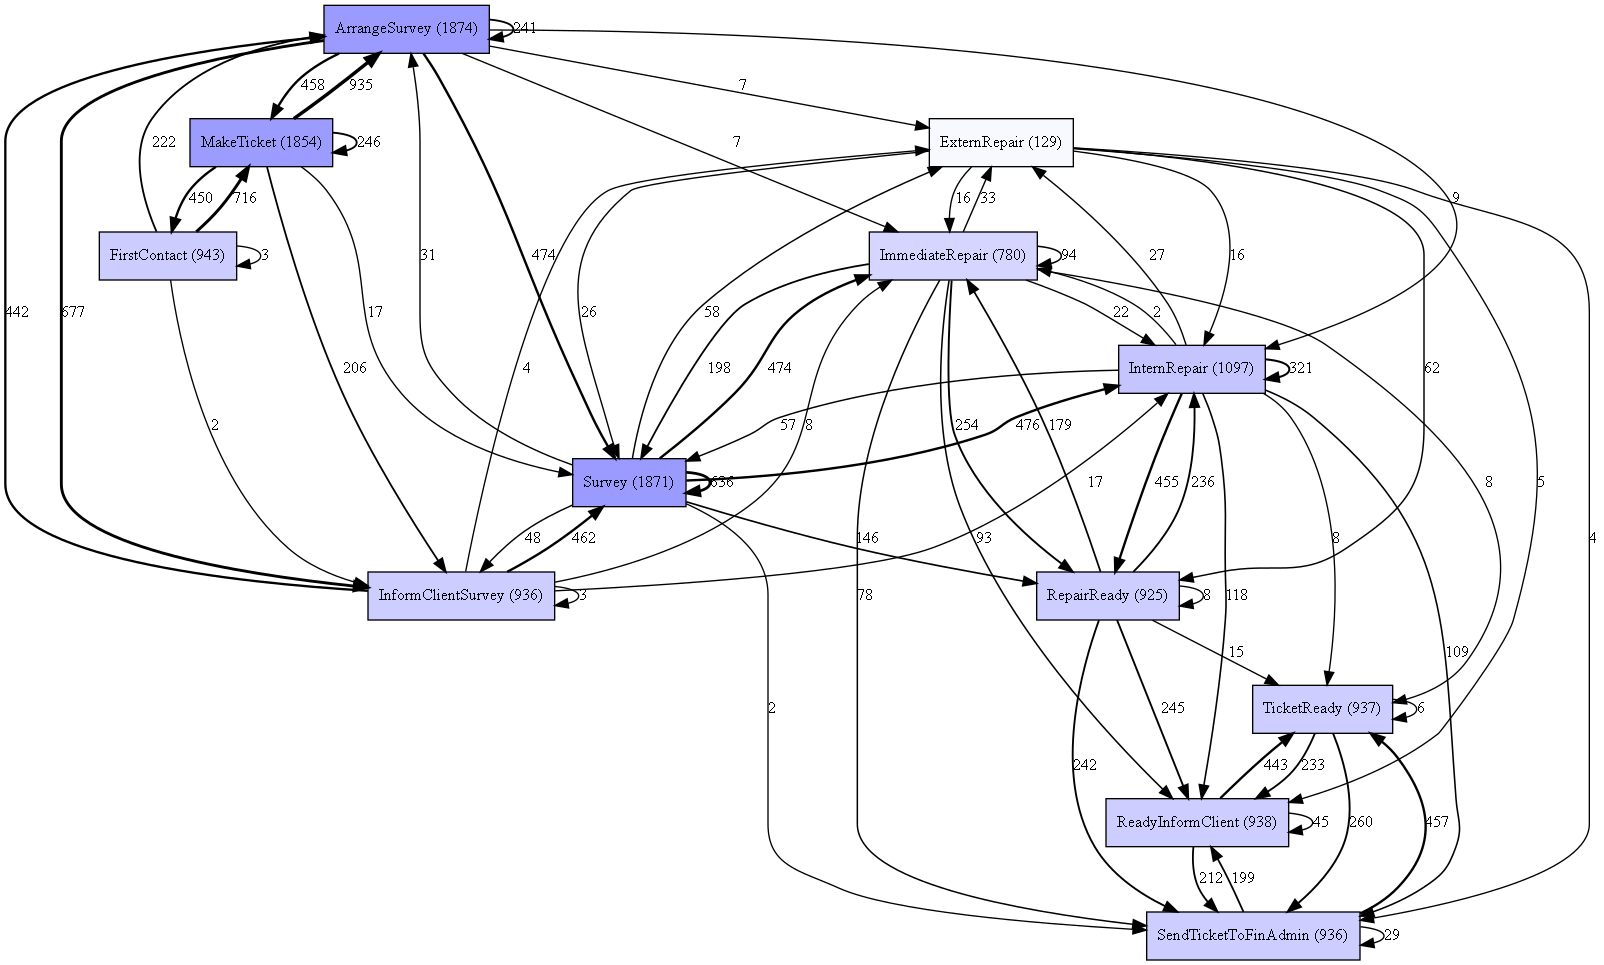

In [40]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
import pandas as pd
import pm4py
# dataframe = pd.read_csv('./repair2.csv')
# #dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
# dataframe = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID', start_timestamp_key='date',timestamp_key='time')

# event_log = pm4py.convert_to_event_log(dataframe)
dfg = dfg_discovery.apply(log_target.loc[:,['caseID','taskID','case:concept:name','concept:name','time:timestamp']])
gviz = dfg_visualization.apply(dfg, log=event_log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

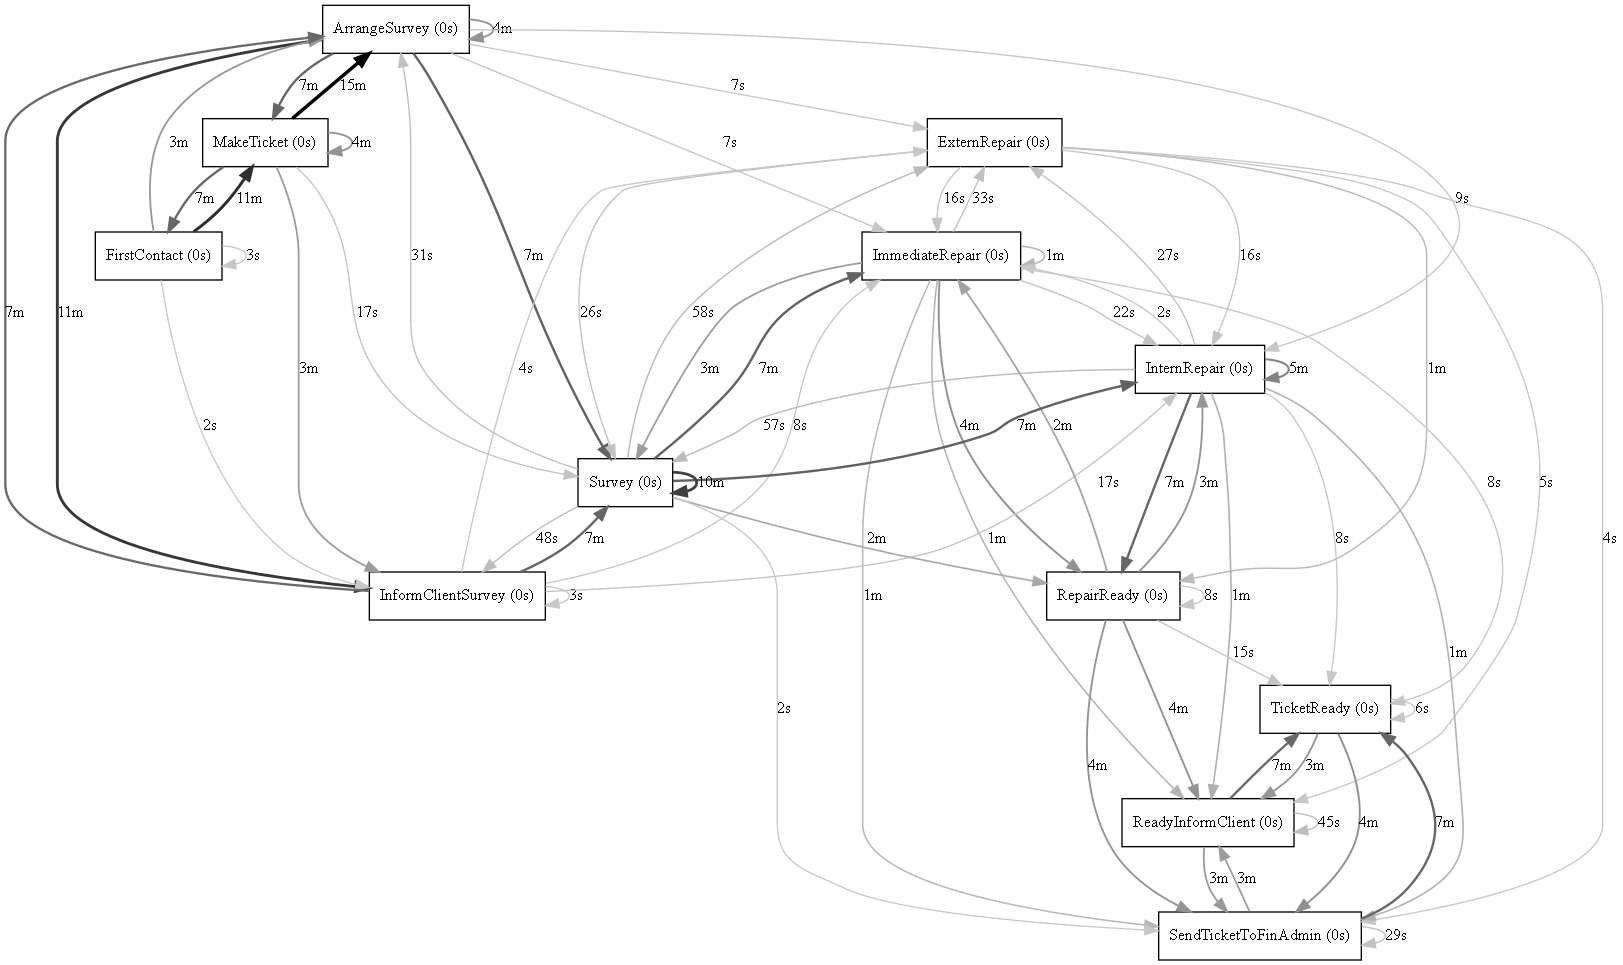

In [42]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
import pandas as pd
import pm4py
# dataframe = pd.read_csv('./repair2.csv')
# #dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
# dataframe = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID', start_timestamp_key='date',timestamp_key='time')

# event_log = pm4py.convert_to_event_log(dataframe)
dfg = dfg_discovery.apply(log_target.loc[:,['caseID','taskID','case:concept:name','concept:name','time:timestamp']])
gviz = dfg_visualization.apply(dfg, log=event_log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)

In [54]:
using_case = list(set(log_target['caseID']))
ans = []
for i in using_case:
    sample = log_target[log_target['caseID'] == i]
    ans.append(sample.loc[:,'taskID'][sample['taskID'] == 'Survey'].count())

In [61]:
import collections
dict(collections.Counter(ans))

{2: 757, 6: 5, 1: 107, 4: 55, 0: 3}